This is exercise for identifying seasonality in board stock market trend with "statsmodels" package
1. Get  S&P500 ETF - "SPY" historical price
2. Format the data to weekly freqency
3. Decompose the time series data

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose # type: ignore

import pandas as pd

import yfinance as yf

from datetime import datetime, timedelta


In [29]:
import warnings 
warnings.filterwarnings('ignore')

In [30]:
#symbol and date range parameters
sym = "SPY"
end_date = datetime.today()
start_date = end_date - timedelta(days = 5*365)

In [31]:
#download data from yahoo finance
adj_close_df = pd.DataFrame()
data = yf.download(sym, start = start_date,end = end_date)
adj_close_df[sym] = data['Adj Close']




[*********************100%%**********************]  1 of 1 completed


In [32]:
#preview the data
adj_close_df.head(10)

,SPY
Date,
2019-04-29,271.171082
2019-04-30,271.309448
2019-05-01,269.270203
2019-05-02,268.688843
2019-05-03,271.318665
2019-05-06,270.202118
2019-05-07,265.689819
2019-05-08,265.320770
2019-05-09,264.517975


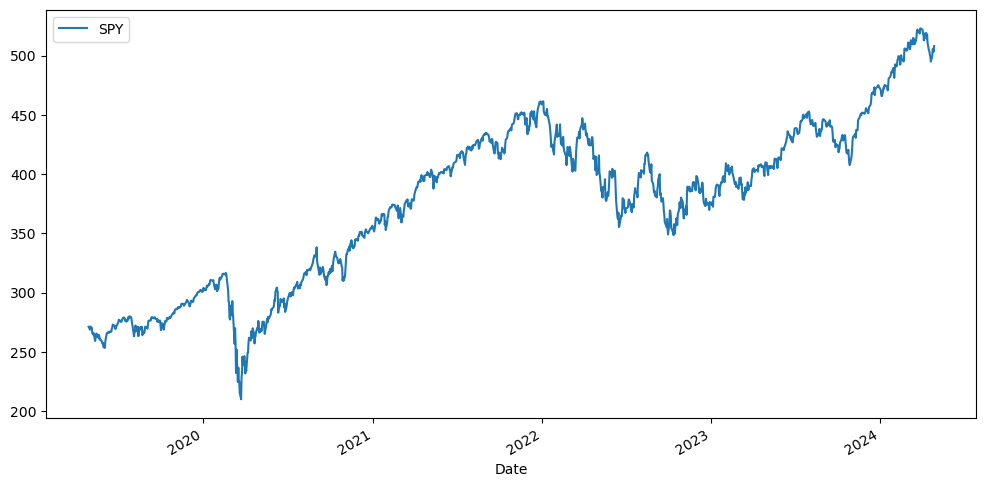

In [33]:
#Plot the series
ax = adj_close_df.plot(figsize=(12,6))

In [34]:
#resample data into weekly period.  Model may fail due to missing daily data
adj_close_df = adj_close_df.resample("W").last()


In [35]:
#preview data after resampling
adj_close_df.head(10)

,SPY
Date,
2019-05-05,271.318665
2019-05-12,265.846741
2019-05-19,263.761292
2019-05-26,260.937683
2019-06-02,254.007767
2019-06-09,265.431549
2019-06-16,266.917145
2019-06-23,272.610413
2019-06-30,271.683258


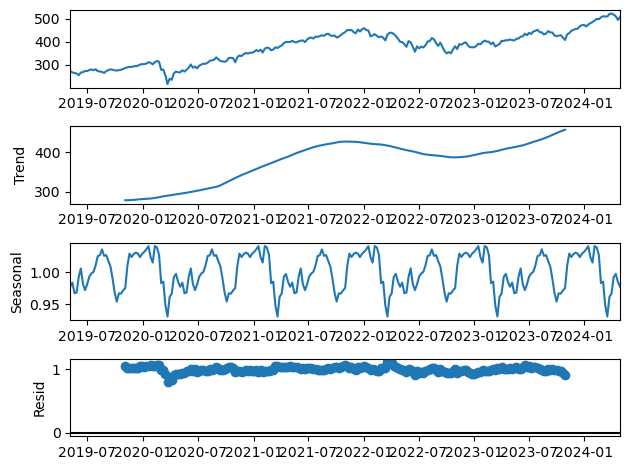

In [36]:
#decompose time series with 'multiplicative'
decompose_result_mult = seasonal_decompose(adj_close_df, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();